In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"
cwd_Images_Results = cwd + "\\Results"

In [3]:
df = pd.read_csv(cwd + "\\Results\\Variogram.csv")
# Remove 30m because it's useless from now on
df = df[df['Distance']!=30]
# Remove STD, Range, Nugget
df = df.drop(columns = ['STD','Range','Nugget'])
df.head()

,Site,Distance,CV,Sill
1,ATGE,100,0.478179,267.887789
2,ATGE,300,0.428943,449.836840
3,ATGE,600,0.505233,453.765630
4,ATGE,900,0.502820,438.814722
6,ATLAS-Mohammed V,100,0.170407,18.800881


In [4]:
df_100 = df[df['Distance'] == 100].reset_index(drop = True)
df_300 = df[df['Distance'] == 300].reset_index(drop = True)
df_600 = df[df['Distance'] == 600].reset_index(drop = True)
df_900 = df[df['Distance'] == 900].reset_index(drop = True)

<Axes: title={'center': 'ROI of All Sites'}, xlabel='Sill', ylabel='CV'>

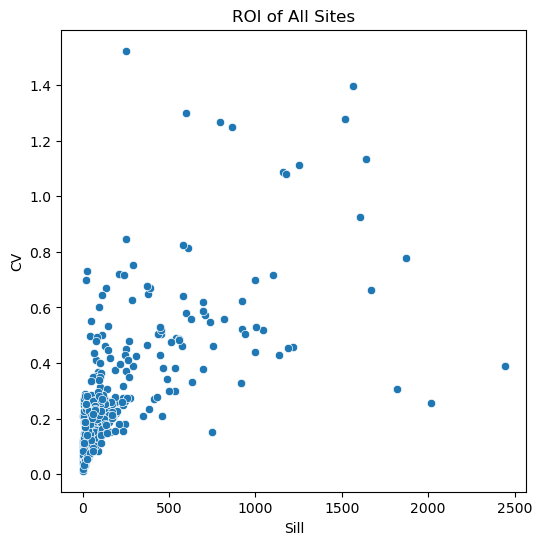

In [42]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title("ROI of All Sites")
sns.scatterplot(data=df, x="Sill", y="CV")

# Z Score Normalization on All ROIs

In [43]:
# Perform Z-normalization
df_Z = df.copy()
df_Z['CV N'] = (df_Z['CV'] - np.mean(df_Z['CV'])) / np.std(df_Z['CV'])
df_Z['Sill N'] = (df_Z['Sill'] - np.mean(df_Z['Sill'])) / np.std(df_Z['Sill'])

In [44]:
df_Z

,Site,Distance,CV,Sill,CV N,Sill N
1,ATGE,100,0.478179,267.887789,0.924077,0.210391
2,ATGE,300,0.428943,449.836840,0.711735,0.736514
3,ATGE,600,0.505233,453.765630,1.040754,0.747874
4,ATGE,900,0.502820,438.814722,1.030348,0.704642
6,ATLAS-Mohammed V,100,0.170407,18.800881,-0.403257,-0.509868
...,...,...,...,...,...,...
499,Utqiagvik,900,0.251612,22.842020,-0.053044,-0.498182
501,WWUK,100,0.053218,28.741305,-0.908658,-0.481124
502,WWUK,300,0.085156,61.591492,-0.770918,-0.386134
503,WWUK,600,0.110789,106.923235,-0.660370,-0.255053


<Axes: title={'center': 'ROI of All Sites'}, xlabel='Sill N', ylabel='CV N'>

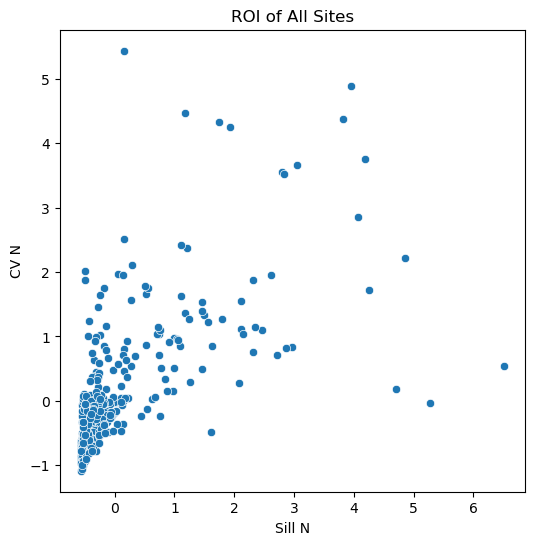

In [45]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title("ROI of All Sites")
sns.scatterplot(data=df_Z, x="Sill N", y="CV N")

In [46]:
df_Z['HI'] = - (df_Z['CV N'] + df_Z['Sill N'])
df_Z.to_csv(cwd_Images_Results + "\\HI ZScore.csv" )
df_Z

,Site,Distance,CV,Sill,CV N,Sill N,HI
1,ATGE,100,0.478179,267.887789,0.924077,0.210391,-1.134468
2,ATGE,300,0.428943,449.836840,0.711735,0.736514,-1.448249
3,ATGE,600,0.505233,453.765630,1.040754,0.747874,-1.788628
4,ATGE,900,0.502820,438.814722,1.030348,0.704642,-1.734990
6,ATLAS-Mohammed V,100,0.170407,18.800881,-0.403257,-0.509868,0.913125
...,...,...,...,...,...,...,...
499,Utqiagvik,900,0.251612,22.842020,-0.053044,-0.498182,0.551226
501,WWUK,100,0.053218,28.741305,-0.908658,-0.481124,1.389782
502,WWUK,300,0.085156,61.591492,-0.770918,-0.386134,1.157052
503,WWUK,600,0.110789,106.923235,-0.660370,-0.255053,0.915423


In [47]:
list_Site = list(df['Site'].unique())
list_HI100 = list(df_Z[df_Z['Distance'] == 100]['HI'])
list_HI300 = list(df_Z[df_Z['Distance'] == 300]['HI'])
list_HI600 = list(df_Z[df_Z['Distance'] == 600]['HI'])
list_HI900 = list(df_Z[df_Z['Distance'] == 900]['HI'])

In [48]:
df_Final = pd.DataFrame({
    "Site": list_Site,
    "HI 100": list_HI100,
    "HI 300": list_HI300,
    "HI 600": list_HI600,
    "HI 900":list_HI900
})
df_Final['HI Total'] = (df_Final['HI 100'] + df_Final['HI 300'] + df_Final['HI 600'] + df_Final['HI 900']) / 4
df_Final = df_Final.sort_values('HI Total', ascending = False)
df_Final.to_csv(cwd_Images_Results + "\\HI Z Avg.csv", index = False)
df_Final

,Site,HI 100,HI 300,HI 600,HI 900,HI Total
47,GHNA,1.497141,1.483896,1.455267,1.415850,1.463039
3,AT-Mmg,1.437072,1.450260,1.439997,1.407166,1.433624
64,KEN-KAP,1.533254,1.307033,1.248871,1.245578,1.333684
66,NED-ESSEN,1.350720,1.278608,1.219001,1.206256,1.263646
49,INDONESIA,1.441088,1.260283,1.053830,1.100898,1.214025
...,...,...,...,...,...,...
65,LOBE,1.203910,-1.371809,-6.193601,-6.360066,-3.180391
74,S. KOREA-FOR 1,0.364555,-3.795237,-5.975623,-7.074765,-4.120267
75,S. KOREA-FOR 2,-1.119447,-5.239279,-4.891317,-7.049664,-4.574926
27,DE-SEL,1.411690,-5.642783,-8.199777,-6.709089,-4.784990


In [49]:
df_Final = pd.DataFrame({
    "Site": list_Site,
    "HI 100": list_HI100,
    "HI 300": list_HI300,
    "HI 600": list_HI600,
    "HI 900":list_HI900
})
df_Final['HI Total'] = df_Final['HI 100'] / 19 + df_Final['HI 300'] * 3 / 19 + df_Final['HI 600'] * 6 / 19 + df_Final['HI 900'] * 9 / 19
df_Final = df_Final.sort_values('HI Total', ascending = False)
df_Final.to_csv(cwd_Images_Results + "\\HI Z Avg Weight.csv", index = False)
df_Final

,Site,HI 100,HI 300,HI 600,HI 900,HI Total
47,GHNA,1.497141,1.483896,1.455267,1.415850,1.443320
3,AT-Mmg,1.437072,1.450260,1.439997,1.407166,1.425912
64,KEN-KAP,1.533254,1.307033,1.248871,1.245578,1.271462
66,NED-ESSEN,1.350720,1.278608,1.219001,1.206256,1.229308
16,Dahara (Senegal),1.182234,1.204049,1.190365,1.179788,1.187087
...,...,...,...,...,...,...
65,LOBE,1.203910,-1.371809,-6.193601,-6.360066,-5.121774
75,S. KOREA-FOR 2,-1.119447,-5.239279,-4.891317,-7.049664,-5.770113
74,S. KOREA-FOR 1,0.364555,-3.795237,-5.975623,-7.074765,-5.818304
27,DE-SEL,1.411690,-5.642783,-8.199777,-6.709089,-6.584059


# Z Score Normalization on separate ROI

In [50]:
# Perform Z-normalization
df_Z_100 = df_100.copy()
df_Z_100['CV N'] = (df_Z_100['CV'] - np.mean(df_Z_100['CV'])) / np.std(df_Z_100['CV'])
df_Z_100['Sill N'] = (df_Z_100['Sill'] - np.mean(df_Z_100['Sill'])) / np.std(df_Z_100['Sill'])
df_Z_300 = df_300.copy()
df_Z_300['CV N'] = (df_Z_300['CV'] - np.mean(df_Z_300['CV'])) / np.std(df_Z_300['CV'])
df_Z_300['Sill N'] = (df_Z_300['Sill'] - np.mean(df_Z_300['Sill'])) / np.std(df_Z_300['Sill'])
df_Z_600 = df_600.copy()
df_Z_600['CV N'] = (df_Z_600['CV'] - np.mean(df_Z_600['CV'])) / np.std(df_Z_600['CV'])
df_Z_600['Sill N'] = (df_Z_600['Sill'] - np.mean(df_Z_600['Sill'])) / np.std(df_Z_600['Sill'])
df_Z_900 = df_900.copy()
df_Z_900['CV N'] = (df_Z_900['CV'] - np.mean(df_Z_900['CV'])) / np.std(df_Z_900['CV'])
df_Z_900['Sill N'] = (df_Z_900['Sill'] - np.mean(df_Z_900['Sill'])) / np.std(df_Z_900['Sill'])
df_Z_Sep = pd.concat([df_Z_100,df_Z_300,df_Z_600,df_Z_900]).reset_index(drop = True).sort_values(['Site','Distance'])
df_Z_Sep

,Site,Distance,CV,Sill,CV N,Sill N
3,AT-Mmg,100,0.059300,3.316349,-0.594549,-0.521755
104,AT-Mmg,300,0.056158,3.442307,-0.843561,-0.508027
205,AT-Mmg,600,0.058228,3.904039,-0.970601,-0.639189
306,AT-Mmg,900,0.065007,5.146960,-1.222869,-0.707608
0,ATGE,100,0.478179,267.887789,1.828797,1.962804
...,...,...,...,...,...,...
402,Utqiagvik,900,0.251612,22.842020,-0.400529,-0.666888
100,WWUK,100,0.053218,28.741305,-0.629733,-0.282992
201,WWUK,300,0.085156,61.591492,-0.716070,-0.321654
302,WWUK,600,0.110789,106.923235,-0.762214,-0.368364


# MIN MAX Normalization (Keep Outliers)

In [6]:
scaler = MinMaxScaler()

In [75]:
df_M = df.copy()
df_M['CV N'] = df_M['CV'].apply(lambda x: x if x<=1 else 1)
df_M['Sill N'] = scaler.fit_transform(df[['Sill']])
df_M.head()

,Site,Distance,CV,Sill,CV N,Sill N
1,ATGE,100,0.478179,267.887789,0.478179,0.109509
2,ATGE,300,0.428943,449.836840,0.428943,0.183911
3,ATGE,600,0.505233,453.765630,0.505233,0.185518
4,ATGE,900,0.502820,438.814722,0.502820,0.179404
6,ATLAS-Mohammed V,100,0.170407,18.800881,0.170407,0.007654


In [76]:
df_M['HI'] = (df_M['CV N'] * df_M['Sill N'])
df_M.to_csv(cwd_Images_Results + "\\HI AllROI MinMax.csv", index = False)
df_M

,Site,Distance,CV,Sill,CV N,Sill N,HI
1,ATGE,100,0.478179,267.887789,0.478179,0.109509,0.052365
2,ATGE,300,0.428943,449.836840,0.428943,0.183911,0.078887
3,ATGE,600,0.505233,453.765630,0.505233,0.185518,0.093730
4,ATGE,900,0.502820,438.814722,0.502820,0.179404,0.090208
6,ATLAS-Mohammed V,100,0.170407,18.800881,0.170407,0.007654,0.001304
...,...,...,...,...,...,...,...
499,Utqiagvik,900,0.251612,22.842020,0.251612,0.009306,0.002342
501,WWUK,100,0.053218,28.741305,0.053218,0.011719,0.000624
502,WWUK,300,0.085156,61.591492,0.085156,0.025152,0.002142
503,WWUK,600,0.110789,106.923235,0.110789,0.043688,0.004840


<Axes: title={'center': 'ROI of All Sites'}, xlabel='Sill N', ylabel='CV N'>

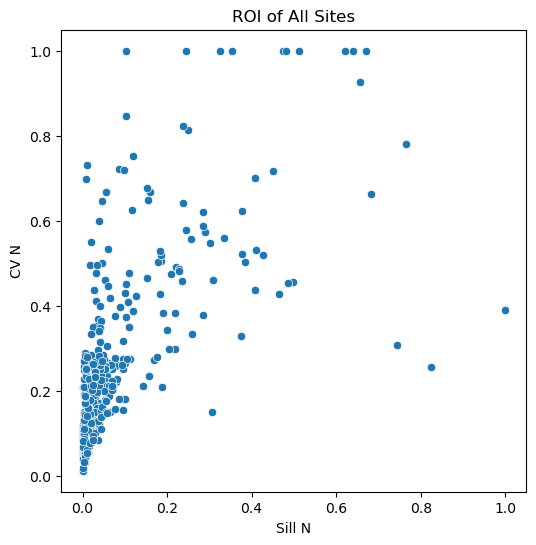

In [77]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title("ROI of All Sites")
sns.scatterplot(data=df_M, x="Sill N", y="CV N")

In [78]:
list_Site = list(df_M['Site'].unique())
list_HI100 = list(df_M[df_M['Distance'] == 100]['HI'])
list_HI300 = list(df_M[df_M['Distance'] == 300]['HI'])
list_HI600 = list(df_M[df_M['Distance'] == 600]['HI'])
list_HI900 = list(df_M[df_M['Distance'] == 900]['HI'])

In [79]:
df_Final = pd.DataFrame({
    "Site": list_Site,
    "HI 100": list_HI100,
    "HI 300": list_HI300,
    "HI 600": list_HI600,
    "HI 900":list_HI900
})
df_Final['HI Total'] = (df_Final['HI 100'] + df_Final['HI 300'] + df_Final['HI 600'] + df_Final['HI 900']) / 4
df_Final = df_Final.sort_values('HI Total', ascending = True)
df_Final.to_csv(cwd_Images_Results + "\\HI AllROI MinMax Average.csv", index = False)
df_Final

,Site,HI 100,HI 300,HI 600,HI 900,HI Total
47,GHNA,0.000000,1.423956e-07,7.211754e-07,0.000002,6.703399e-07
64,KEN-KAP,0.000003,4.450798e-05,8.210040e-05,0.000076,5.124468e-05
3,AT-Mmg,0.000078,7.713562e-05,9.097295e-05,0.000135,9.527744e-05
16,Dahara (Senegal),0.000123,9.675363e-05,9.880134e-05,0.000097,1.039996e-04
76,SE-Svb,0.000195,1.306742e-04,2.943658e-04,0.000646,3.166578e-04
...,...,...,...,...,...,...
65,LOBE,0.000035,6.531318e-03,3.537147e-01,0.481363,2.104112e-01
75,S. KOREA-FOR 2,0.046468,2.122241e-01,2.290159e-01,0.389650,2.193396e-01
74,S. KOREA-FOR 1,0.014667,2.278756e-01,4.516117e-01,0.596955,3.227773e-01
27,DE-SEL,0.000009,2.455532e-01,6.208426e-01,0.511613,3.445045e-01


In [80]:
# df_Final = pd.DataFrame({
#     "Site": list_Site,
#     "HI 100": list_HI100,
#     "HI 300": list_HI300,
#     "HI 600": list_HI600,
#     "HI 900":list_HI900
# })
# df_Final['HI Total'] = df_Final['HI 100'] / 19 + df_Final['HI 300'] * 3 / 19 + df_Final['HI 600'] * 6 / 19 + df_Final['HI 900'] * 9 / 19
# df_Final = df_Final.sort_values('HI Total', ascending = True)
# df_Final.to_csv(cwd_Images_Results + "\\HI MinMax HI Avg Weight.csv")
# df_Final

## On Separate ROI

In [7]:
scaler = MinMaxScaler()

In [8]:
df_MM_100 = df_100.copy()
df_MM_100['CV N'] = df_MM_100['CV'].apply(lambda x: x if x<=1 else 1)
df_MM_100['Sill N'] = scaler.fit_transform(df_MM_100[['Sill']])
df_MM_300 = df_300.copy()
df_MM_300['CV N'] = df_MM_300['CV'].apply(lambda x: x if x<=1 else 1)
df_MM_300['Sill N'] = scaler.fit_transform(df_MM_300[['Sill']])
df_MM_600 = df_600.copy()
df_MM_600['CV N'] = df_MM_600['CV'].apply(lambda x: x if x<=1 else 1)
df_MM_600['Sill N'] = scaler.fit_transform(df_MM_600[['Sill']])
df_MM_900 = df_900.copy()
df_MM_900['CV N'] = df_MM_900['CV'].apply(lambda x: x if x<=1 else 1)
df_MM_900['Sill N'] = scaler.fit_transform(df_MM_900[['Sill']])

df_MM_Sep = pd.concat([df_MM_100,df_MM_300,df_MM_600,df_MM_900]).reset_index(drop = True).sort_values(['Site','Distance'])
df_MM_Sep['HI'] = (df_MM_Sep['CV N'] * df_MM_Sep['Sill N'])
df_MM_Sep.to_csv(cwd_Images_Results + "\\HI SepROI MinMax.csv", index = False)
df_MM_Sep

,Site,Distance,CV,Sill,CV N,Sill N,HI
3,AT-Mmg,100,0.059300,3.316349,0.059300,0.004312,0.000256
104,AT-Mmg,300,0.056158,3.442307,0.056158,0.001662,0.000093
205,AT-Mmg,600,0.058228,3.904039,0.058228,0.002080,0.000121
306,AT-Mmg,900,0.065007,5.146960,0.065007,0.002043,0.000133
0,ATGE,100,0.478179,267.887789,0.478179,0.357199,0.170805
...,...,...,...,...,...,...,...
402,Utqiagvik,900,0.251612,22.842020,0.251612,0.009279,0.002335
100,WWUK,100,0.053218,28.741305,0.053218,0.038224,0.002034
201,WWUK,300,0.085156,61.591492,0.085156,0.030495,0.002597
302,WWUK,600,0.110789,106.923235,0.110789,0.058633,0.006496


<Axes: title={'center': 'ROI of All Sites'}, xlabel='Sill N', ylabel='CV N'>

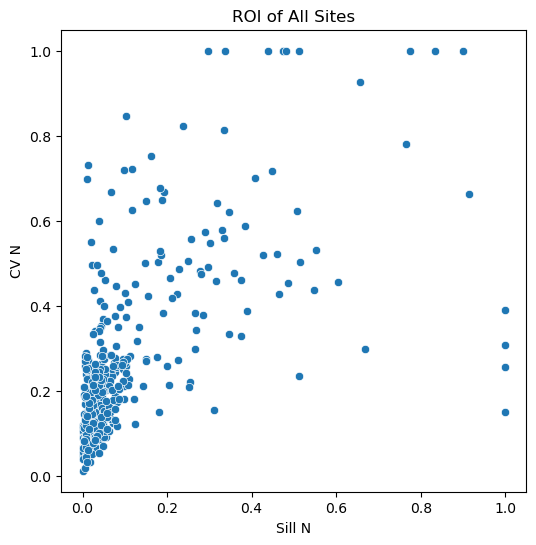

In [9]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title("ROI of All Sites")
sns.scatterplot(data=df_MM_Sep, x="Sill N", y="CV N")

In [10]:
list_Site = list(df_MM_Sep['Site'].unique())
list_HI100 = list(df_MM_Sep[df_MM_Sep['Distance'] == 100]['HI'])
list_HI300 = list(df_MM_Sep[df_MM_Sep['Distance'] == 300]['HI'])
list_HI600 = list(df_MM_Sep[df_MM_Sep['Distance'] == 600]['HI'])
list_HI900 = list(df_MM_Sep[df_MM_Sep['Distance'] == 900]['HI'])

In [11]:
df_Final = pd.DataFrame({
    "Site": list_Site,
    "HI 100": list_HI100,
    "HI 300": list_HI300,
    "HI 600": list_HI600,
    "HI 900":list_HI900
})
df_Final['HI Total'] = (df_Final['HI 100'] + df_Final['HI 300'] + df_Final['HI 600'] + df_Final['HI 900']) / 4
df_Final = df_Final.sort_values('HI Total', ascending = True)
df_Final.to_csv(cwd_Images_Results + "\\HI SepROI MinMax Average.csv", index = False)
df_Final

,Site,HI 100,HI 300,HI 600,HI 900,HI Total
47,GHNA,0.000000,0.000000,0.000000,0.000000,0.000000
64,KEN-KAP,0.000009,0.000054,0.000108,0.000073,0.000061
0,AT-Mmg,0.000256,0.000093,0.000121,0.000133,0.000151
29,Dahara (Senegal),0.000401,0.000117,0.000131,0.000094,0.000186
76,SE-Svb,0.000637,0.000158,0.000393,0.000642,0.000458
...,...,...,...,...,...,...
65,LOBE,0.000115,0.007918,0.474829,0.481349,0.241053
75,S. KOREA-FOR 2,0.151571,0.257342,0.307438,0.389650,0.276500
74,S. KOREA-FOR 1,0.047840,0.276321,0.606257,0.596950,0.381842
25,DE-SEL,0.000029,0.297755,0.833436,0.511600,0.410705


In [85]:
df_MN = df.copy()
# Define a threshold for Z-score (e.g., 3)
threshold = 1.5
# Calculate Z-scores
df_MN['zscore'] = (df_MN['CV'] - df_MN['CV'].mean()) / df_MN['CV'].std()
# Filter out outliers
df_MN = df_MN[np.abs(df_MN['zscore']) < threshold]
df_MN = df_MN.drop(columns=['zscore'])

# Calculate Z-scores
df_MN['zscore'] = (df_MN['Sill'] - df_MN['Sill'].mean()) / df_MN['Sill'].std()
# Filter out outliers
df_MN = df_MN[np.abs(df_MN['zscore']) < threshold]

# Drop the Z-score column
df_MN = df_MN.drop(columns=['zscore'])
scaler = MinMaxScaler()
df_MN['CV N'] = scaler.fit_transform(df_MN[['CV']])
df_MN['Sill N'] = scaler.fit_transform(df_MN[['Sill']])
len(df_MN['Site'].unique())

98

<Axes: title={'center': 'ROI of All Sites'}, xlabel='Sill N', ylabel='CV N'>

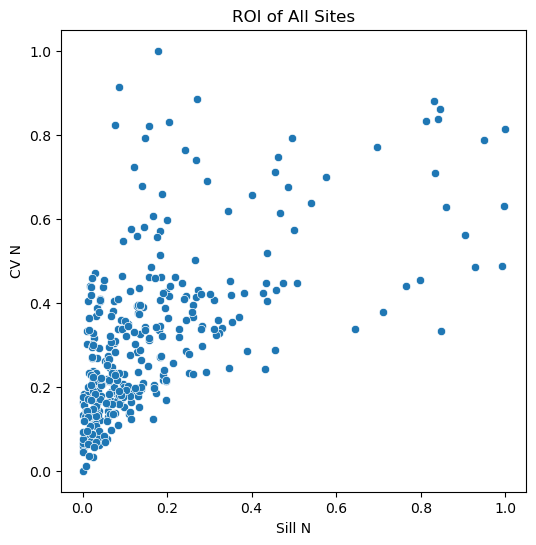

In [86]:
fig, ax = plt.subplots(figsize = (6,6))
plt.title("ROI of All Sites")
sns.scatterplot(data=df_MN, x="Sill N", y="CV N")